In [1]:
# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the data from the CSV file
data1 = pd.read_csv("socialinsider_events_2024-05.csv")
data2 = pd.read_csv("socialinsider_events_2024-06.csv")
data3 = pd.read_csv("socialinsider_events_2024-07.csv")
data4 = pd.read_csv("socialinsider_events_2024-08.csv")
data5 = pd.read_csv("socialinsider_events_2024-09.csv")

In [3]:
# Concatenate the data
data = pd.concat([data1, data2, data3, data4, data5])

# Sort the data by time_created
data = data.sort_values(by="time_created")

In [4]:
data

,event_name,user_id,time_created,user_type,time_zone,country,view,platform,report_type,load_time
237525,profile load success,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T20:59:17.702Z,trial,Europe/London,Britain (UK),profile,ig,NaN,1.264
237524,section change,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:06.728Z,trial,Europe/London,Britain (UK),profile,ig,NaN,NaN
237523,compare,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:06.765Z,trial,Europe/London,Britain (UK),profile,instagram,NaN,NaN
237522,section change,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:20.243Z,trial,Europe/London,Britain (UK),profile,ig,NaN,NaN
237521,profile visit,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:27.275Z,trial,Europe/London,Britain (UK),profile,tw,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4,i10e_new_project,5ec95a7548babd264a6572cbec3d2e92d47bc26945552a...,2024-09-17T15:40:02.040Z,trial,America/New_York,United States,projecthome,xch,NaN,NaN
3,profile visit,74f7758e77ac3a7ed66af7e7226e2aad60f18310244cb7...,2024-09-17T15:40:23.029Z,trial,Asia/Manila,Philippines,profile,fb,NaN,NaN
2,profile load success,74f7758e77ac3a7ed66af7e7226e2aad60f18310244cb7...,2024-09-17T15:40:24.227Z,trial,Asia/Manila,Philippines,profile,fb,NaN,1.732
1,section change,74f7758e77ac3a7ed66af7e7226e2aad60f18310244cb7...,2024-09-17T15:40:24.836Z,trial,Asia/Manila,Philippines,profile,fb,NaN,NaN


In [5]:
# Create a column that show whether the event is successful or not
buy_users = data[
    (data["event_name"] == "New Client") | (data["event_name"] == "Buy Success")
]["user_id"].tolist()
# 1 if the user is in buy_users, 0 otherwise
data["successful"] = data["user_id"].apply(lambda x: 1 if x in buy_users else 0)
data

,event_name,user_id,time_created,user_type,time_zone,country,view,platform,report_type,load_time,successful
237525,profile load success,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T20:59:17.702Z,trial,Europe/London,Britain (UK),profile,ig,NaN,1.264,0
237524,section change,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:06.728Z,trial,Europe/London,Britain (UK),profile,ig,NaN,NaN,0
237523,compare,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:06.765Z,trial,Europe/London,Britain (UK),profile,instagram,NaN,NaN,0
237522,section change,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:20.243Z,trial,Europe/London,Britain (UK),profile,ig,NaN,NaN,0
237521,profile visit,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:27.275Z,trial,Europe/London,Britain (UK),profile,tw,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
4,i10e_new_project,5ec95a7548babd264a6572cbec3d2e92d47bc26945552a...,2024-09-17T15:40:02.040Z,trial,America/New_York,United States,projecthome,xch,NaN,NaN,0
3,profile visit,74f7758e77ac3a7ed66af7e7226e2aad60f18310244cb7...,2024-09-17T15:40:23.029Z,trial,Asia/Manila,Philippines,profile,fb,NaN,NaN,0
2,profile load success,74f7758e77ac3a7ed66af7e7226e2aad60f18310244cb7...,2024-09-17T15:40:24.227Z,trial,Asia/Manila,Philippines,profile,fb,NaN,1.732,0
1,section change,74f7758e77ac3a7ed66af7e7226e2aad60f18310244cb7...,2024-09-17T15:40:24.836Z,trial,Asia/Manila,Philippines,profile,fb,NaN,NaN,0


In [6]:
# create the date that the event was created
data["Date_Created"] = pd.to_datetime(data["time_created"]).dt.date
# create the hour that the event was created
data["Hour_Created"] = pd.to_datetime(data["time_created"]).dt.hour
# create the day of the week that the event was created
data["Day_Of_Week_Created"] = pd.to_datetime(data["time_created"]).dt.day_name()

In [7]:
data.head()

,event_name,user_id,time_created,user_type,time_zone,country,view,platform,report_type,load_time,successful,Date_Created,Hour_Created,Day_Of_Week_Created
237525,profile load success,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T20:59:17.702Z,trial,Europe/London,Britain (UK),profile,ig,NaN,1.264,0,2024-04-30,20,Tuesday
237524,section change,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:06.728Z,trial,Europe/London,Britain (UK),profile,ig,NaN,NaN,0,2024-04-30,21,Tuesday
237523,compare,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:06.765Z,trial,Europe/London,Britain (UK),profile,instagram,NaN,NaN,0,2024-04-30,21,Tuesday
237522,section change,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:20.243Z,trial,Europe/London,Britain (UK),profile,ig,NaN,NaN,0,2024-04-30,21,Tuesday
237521,profile visit,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:27.275Z,trial,Europe/London,Britain (UK),profile,tw,NaN,NaN,0,2024-04-30,21,Tuesday


In [8]:
data["load_time"].isnull().sum()

830333

In [9]:
# get the average load time for each client and sort by the average load time
average_load_time = data.groupby("user_id")["load_time"].mean().sort_values()

In [10]:
# get the average load time for each type of event and sort by the average load time
average_load_time_event = (
    data.groupby("event_name")["load_time"].mean().sort_values(ascending=False)
)
average_load_time_event

event_name
export report success            13.478728
bench load fail                   2.839000
profile load success              2.529067
brand load success                2.306171
profile load pending              1.668292
                                   ...    
upload logo click                      NaN
upload logo success                    NaN
view suggested campaign click          NaN
xch bench click                        NaN
yt bench click                         NaN
Name: load_time, Length: 177, dtype: float64

In [11]:
# find the event_name that has "load" in it
load_events = data["event_name"].str.contains("load", case=False)
load_events

237525     True
237524    False
237523    False
237522    False
237521    False
          ...  
4         False
3         False
2          True
1         False
0          True
Name: event_name, Length: 970517, dtype: object

In [12]:
average_load_time_event[average_load_time_event.notnull()]

# find the event name that average load time is not null, get the event name
event_names = average_load_time_event[average_load_time_event.notnull()].index

In [13]:
event_names = event_names.tolist()

In [14]:
# The number of users for each view, sort by the number of users
number_of_users = data.groupby("view")["user_id"].count().sort_values(ascending=False)
number_of_users

view
profile        374510
benchmark       89610
projecthome     69399
postsfeed       28018
brands          25806
campaigns       21622
reports          6934
upgradeplan      6200
hashtag          4818
settings         1887
bench             282
add               280
proj              129
ads                98
addprofiles        76
search             38
connect            18
page                1
Name: user_id, dtype: int64

In [15]:
number_of_users

view
profile        374510
benchmark       89610
projecthome     69399
postsfeed       28018
brands          25806
campaigns       21622
reports          6934
upgradeplan      6200
hashtag          4818
settings         1887
bench             282
add               280
proj              129
ads                98
addprofiles        76
search             38
connect            18
page                1
Name: user_id, dtype: int64

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

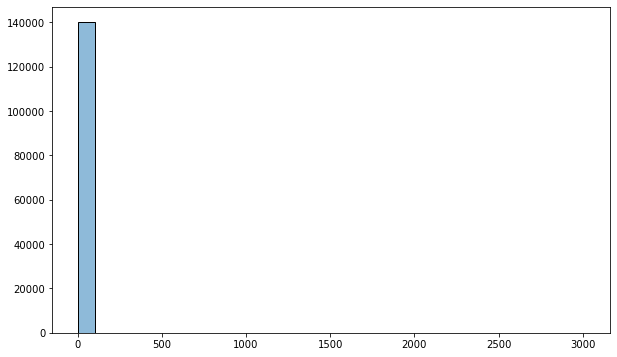

In [16]:
# graph the distribution for load time

plt.figure(figsize=(10, 6))
sns.histplot(data["load_time"], bins=30, kde=True)
plt.title("Distribution of Load Time")
plt.xlabel("Load Time")
plt.ylabel("Frequency")
plt.show()

In [17]:
data[(data["event_name"].isin(event_names)) & data["load_time"].isnull()]

,event_name,user_id,time_created,user_type,time_zone,country,view,platform,report_type,load_time,successful,Date_Created,Hour_Created,Day_Of_Week_Created
237353,bench load success,830893075332a8a13e670c8422a820a0ab55c50925db16...,2024-04-30T23:01:37.217Z,trial,America/Bogota,Colombia,benchmark,fb,NaN,NaN,0,2024-04-30,23,Tuesday
236836,brand load success,b5a2471fe440a3476256537ef0f4407bfaf6f89e431afa...,2024-05-01T03:11:19.151Z,trial,America/Port_of_Spain,Trinidad & Tobago,reports,xch,NaN,NaN,0,2024-05-01,3,Wednesday
236835,brand load success,b5a2471fe440a3476256537ef0f4407bfaf6f89e431afa...,2024-05-01T03:11:19.207Z,trial,America/Port_of_Spain,Trinidad & Tobago,reports,xch,NaN,NaN,0,2024-05-01,3,Wednesday
236823,bench load success,6fe0b6ace18b1586bd00e01f3e77f0b4da52c0aa5b984b...,2024-05-01T03:25:02.680Z,trial,Europe/Madrid,Spain,benchmark,ig,NaN,NaN,0,2024-05-01,3,Wednesday
236820,bench load success,6fe0b6ace18b1586bd00e01f3e77f0b4da52c0aa5b984b...,2024-05-01T03:25:46.615Z,trial,Europe/Madrid,Spain,benchmark,ig,NaN,NaN,0,2024-05-01,3,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,brand load success,30a955defa4b4676249c57c9defa69e0ceb396b92b33b1...,2024-09-17T13:15:30.925Z,trial,Asia/Calcutta,India,brands,xch,NaN,NaN,0,2024-09-17,13,Tuesday
857,profile load success,30a955defa4b4676249c57c9defa69e0ceb396b92b33b1...,2024-09-17T13:20:10.126Z,trial,Asia/Calcutta,India,profile,ig,NaN,NaN,0,2024-09-17,13,Tuesday
706,brand load success,77eb9041350b8438c7d6b9d1e4e4fdc56741cd99ed146a...,2024-09-17T13:56:00.354Z,trial,Europe/Paris,France,brands,xch,NaN,NaN,0,2024-09-17,13,Tuesday
540,bench load success,681253bdfccf655736ac0fe157fd62a482459f913e41a3...,2024-09-17T14:17:43.761Z,trial,America/Sao_Paulo,Brazil,benchmark,ig,NaN,NaN,0,2024-09-17,14,Tuesday


In [18]:
# the average load time for events that are not in the event_names

data[~data["event_name"].isin(event_names)]["load_time"].isnull().sum()

817856

In [19]:
data["event_name"].nunique()

177

In [20]:
data[data["load_time"].isnull()]["event_name"].nunique()

177

In [21]:
# Group the load time by users
data.groupby("user_id")["load_time"].mean().sort_values()

user_id
c380482fd11e5a4364e3607a2d0668d4ab12c3a11a6a2a3e3bae256933770bf7    0.122500
32862d850be34ad319aa27f8f3b1b3838c6f9d51fafba9b86fe3740ba8898100    0.143643
7b7529bc4bf54692133aa194e881e779312804af9e695c7d520d15e31100db24    0.171000
d07993aec9fd5b7c99c4e9e73a41597f0de308d1328433817350fecba9d43873    0.191000
aa6cdd2ae032c1d57c4bc859352d6e59838029139d85085b89581fa890295ddb    0.204600
                                                                      ...   
ffab53ab28b3bce0a239d041aee17a94af92d4cb5e0d1e11d81f2446f6ba7fb8         NaN
ffc1cab5ed479ffa3bea3d8a51b9692f5dcb39732387bffb1a32fb6346ecb6c7         NaN
ffc4e909b45c74826abebf494d45b1aa1e1ae59def81ba158f05a0039ab950ad         NaN
ffc98965b870f9cb65e0c18dea863adc818be99c100ae5fbfdb1e4f834a832da         NaN
ffcea18993f7710840473b091428b2843b8b03e3a8c597404d6600ee462018e7         NaN
Name: load_time, Length: 10608, dtype: float64

In [22]:
data

,event_name,user_id,time_created,user_type,time_zone,country,view,platform,report_type,load_time,successful,Date_Created,Hour_Created,Day_Of_Week_Created
237525,profile load success,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T20:59:17.702Z,trial,Europe/London,Britain (UK),profile,ig,NaN,1.264,0,2024-04-30,20,Tuesday
237524,section change,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:06.728Z,trial,Europe/London,Britain (UK),profile,ig,NaN,NaN,0,2024-04-30,21,Tuesday
237523,compare,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:06.765Z,trial,Europe/London,Britain (UK),profile,instagram,NaN,NaN,0,2024-04-30,21,Tuesday
237522,section change,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:20.243Z,trial,Europe/London,Britain (UK),profile,ig,NaN,NaN,0,2024-04-30,21,Tuesday
237521,profile visit,38bd4c351e290c6024d39d44b9a2750ea666eefc9b1069...,2024-04-30T21:00:27.275Z,trial,Europe/London,Britain (UK),profile,tw,NaN,NaN,0,2024-04-30,21,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,i10e_new_project,5ec95a7548babd264a6572cbec3d2e92d47bc26945552a...,2024-09-17T15:40:02.040Z,trial,America/New_York,United States,projecthome,xch,NaN,NaN,0,2024-09-17,15,Tuesday
3,profile visit,74f7758e77ac3a7ed66af7e7226e2aad60f18310244cb7...,2024-09-17T15:40:23.029Z,trial,Asia/Manila,Philippines,profile,fb,NaN,NaN,0,2024-09-17,15,Tuesday
2,profile load success,74f7758e77ac3a7ed66af7e7226e2aad60f18310244cb7...,2024-09-17T15:40:24.227Z,trial,Asia/Manila,Philippines,profile,fb,NaN,1.732,0,2024-09-17,15,Tuesday
1,section change,74f7758e77ac3a7ed66af7e7226e2aad60f18310244cb7...,2024-09-17T15:40:24.836Z,trial,Asia/Manila,Philippines,profile,fb,NaN,NaN,0,2024-09-17,15,Tuesday


In [23]:
# count the data by view and event_name
view_data = data.groupby(["view", "event_name"]).size().unstack(fill_value=0)
view_data

event_name,upgrade_plan,add profile success,autoreports click,book a demo,brand click,brand load success,connect click,connect fb success,connect social accounts sidebar,connect success,...,edit autoreport click,reports_history_add_autoreports,reports_history_copy_link,reports_history_download,save autoreport changes click,save autoreport changes success,save autoreport click,schedule autoreport click,Invoices section click,Manage section click
view,,,,,,,,,,,,,,,,,,,,,
add,280,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
addprofiles,76,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ads,1,5,3,1,2,4,2,3,4,3,...,0,0,0,0,0,0,0,0,0,0
bench,9,0,0,0,0,0,3,0,6,1,...,0,0,0,0,0,0,0,0,0,0
benchmark,261,26,434,19,193,33,13,0,46,1,...,0,0,0,0,0,0,0,0,0,0
brands,103,1,68,10,1336,9039,3,0,25,0,...,0,0,0,0,0,0,0,0,0,0
campaigns,47,3,1608,8,57,9,1,0,10,0,...,0,0,0,0,0,0,0,0,0,0
connect,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hashtag,15,0,0,0,0,0,5,4,15,2,...,0,0,0,0,0,0,0,0,0,0


### Create Buy Success Event and Unsuccessful Event

In [24]:
buy_users = data[
    (data["event_name"] == "New Client") | (data["event_name"] == "Buy Success")
]["user_id"].tolist()
buy_users_events = data[data["user_id"].isin(buy_users)]
# create a dataset with only the unsuccessful events
not_buy_users_events = data[data["successful"] == 0]

### View in buy success event

In [25]:
# calculate the percentage of views in both successful and not successful events
print(
    "buy success event",
    buy_users_events["view"].value_counts() / len(buy_users_events) * 100,
)
print(
    "not buy success event",
    not_buy_users_events["view"].value_counts() / len(not_buy_users_events) * 100,
)

buy success event view
profile        20.923334
benchmark      20.617410
projecthome    10.559006
brands          6.044313
postsfeed       2.197089
campaigns       1.538889
settings        1.075368
upgradeplan     0.862149
reports         0.723093
ads             0.157597
add             0.120515
hashtag         0.111245
addprofiles     0.055623
proj            0.018541
bench           0.018541
connect         0.009270
Name: count, dtype: float64
not buy success event view
profile        38.787263
benchmark       9.105269
projecthome     7.112417
postsfeed       2.894668
brands          2.620945
campaigns       2.235629
reports         0.714368
upgradeplan     0.636325
hashtag         0.500766
settings        0.184531
bench           0.029175
add             0.027820
proj            0.013233
ads             0.008440
addprofiles     0.007294
search          0.003959
connect         0.001771
page            0.000104
Name: count, dtype: float64


# User Data Transformation

#### Success, event count, and country

In [26]:
user_data = (
    data.groupby("user_id")
    .agg(
        {
            "event_name": "count",  # Count events
            "country": "first",  # Take the first occurrence of country (assuming it's the same for each user)
        }
    )
    .reset_index()
    .rename(columns={"event_name": "event_count"})  # Rename for clarity
    .sort_values(by="event_count", ascending=False)  # Sort by event_count
)

In [27]:
# Add the column to show whether the user is successful or not
user_data["successful"] = user_data["user_id"].apply(
    lambda x: 1 if x in buy_users else 0
)
user_data

,user_id,event_count,country,successful
8543,cd6d41c28b017733e39fc13e4d4ae3b308c6baff52561d...,6973,United States,0
3713,5929c3eec5a2b12ee4aa911b8093b33ac7b798d59e3b14...,4700,Indonesia,0
4081,622748abdc404cbf098568074c232b04762d574fa48130...,3925,Ukraine,0
10483,fd15147418cba03da1908de36ac79bc24589c9d1474716...,3538,Thailand,0
3857,5c54eb7d3e4821d8e633e7ef23dacafe3f5a6530715510...,3387,Germany,0
...,...,...,...,...
5897,8f14ccc4db353eaefaab6ac8efc4a3b68b2a8731a3b35a...,0,None,0
10147,f4f9987e642659097752e755b740f7e487f6c252f5be0c...,0,None,0
10467,fcc49dce067e042b96df3e56d2934e551fa4b45d0dcdb0...,0,None,0
1822,2a6612b86399adeeb92d2b44603d8736b1dbfcb84ccf24...,0,None,0


#### Transform Load Time

In [28]:
# add the column to show the average load time for each user
user_data["average_load_time"] = user_data["user_id"].apply(
    lambda x: average_load_time[x] if x in average_load_time else None
)
user_data

,user_id,event_count,country,successful,average_load_time
8543,cd6d41c28b017733e39fc13e4d4ae3b308c6baff52561d...,6973,United States,0,1.238146
3713,5929c3eec5a2b12ee4aa911b8093b33ac7b798d59e3b14...,4700,Indonesia,0,1.040046
4081,622748abdc404cbf098568074c232b04762d574fa48130...,3925,Ukraine,0,1.823422
10483,fd15147418cba03da1908de36ac79bc24589c9d1474716...,3538,Thailand,0,1.692242
3857,5c54eb7d3e4821d8e633e7ef23dacafe3f5a6530715510...,3387,Germany,0,1.908071
...,...,...,...,...,...
5897,8f14ccc4db353eaefaab6ac8efc4a3b68b2a8731a3b35a...,0,None,0,NaN
10147,f4f9987e642659097752e755b740f7e487f6c252f5be0c...,0,None,0,NaN
10467,fcc49dce067e042b96df3e56d2934e551fa4b45d0dcdb0...,0,None,0,NaN
1822,2a6612b86399adeeb92d2b44603d8736b1dbfcb84ccf24...,0,None,0,NaN


#### Converted Event

In [29]:
event_counts = (
    data.groupby("user_id")
    .apply(
        lambda x: pd.Series(
            {
                "event_bench_load_success_count": (
                    x["event_name"] == "bench load success"
                ).sum(),
                "event_profile_search_success_count": (
                    x["event_name"] == "profile search success"
                ).sum(),
                "event_add_profile_success_count": (
                    x["event_name"] == "add profile success"
                ).sum(),
                "event_upgrade_plan_count": (x["event_name"] == "upgrade_plan").sum(),
                "event_pricing_model_count": (
                    x["event_name"] == "pricing modal visited"
                ).sum(),
                "event_profile_load_fail_count": (
                    x["event_name"] == "profile load fail"
                ).sum(),
                "event_email_receipt_count": (x["event_name"] == "email receipt").sum(),
            }
        )
    )
    .reset_index()
)

In [30]:
# join the event_counts dataframe on user_data using user_id
user_data = user_data.merge(event_counts, on="user_id", how="left")

In [31]:
user_data

,user_id,event_count,country,successful,average_load_time,event_bench_load_success_count,event_profile_search_success_count,event_add_profile_success_count,event_upgrade_plan_count,event_pricing_model_count,event_profile_load_fail_count,event_email_receipt_count
0,cd6d41c28b017733e39fc13e4d4ae3b308c6baff52561d...,6973,United States,0,1.238146,0,2,1,3,3,3450,1
1,5929c3eec5a2b12ee4aa911b8093b33ac7b798d59e3b14...,4700,Indonesia,0,1.040046,1,2,2,1,1,0,4
2,622748abdc404cbf098568074c232b04762d574fa48130...,3925,Ukraine,0,1.823422,0,1,3,4,4,1849,1
3,fd15147418cba03da1908de36ac79bc24589c9d1474716...,3538,Thailand,0,1.692242,2,2,3,1,1,1,12
4,5c54eb7d3e4821d8e633e7ef23dacafe3f5a6530715510...,3387,Germany,0,1.908071,9,35,20,0,0,1572,2
...,...,...,...,...,...,...,...,...,...,...,...,...
10603,8f14ccc4db353eaefaab6ac8efc4a3b68b2a8731a3b35a...,0,None,0,NaN,0,0,0,0,0,0,0
10604,f4f9987e642659097752e755b740f7e487f6c252f5be0c...,0,None,0,NaN,0,0,0,0,0,0,0
10605,fcc49dce067e042b96df3e56d2934e551fa4b45d0dcdb0...,0,None,0,NaN,0,0,0,0,0,0,0
10606,2a6612b86399adeeb92d2b44603d8736b1dbfcb84ccf24...,0,None,0,NaN,0,0,0,0,0,0,0


### Country Data

In [32]:
# Group by country to calculate overall conversion rates
country_conversion = (
    user_data.groupby("country")
    .agg(
        total_users=("user_id", "count"),  # Count unique users
        total_success=("successful", "sum"),  # Total successes across users
    )
    .reset_index()
)

# Calculate conversion rate
country_conversion["conversion_rate"] = (
    country_conversion["total_success"] / country_conversion["total_users"]
)
country_conversion = country_conversion.sort_values(by="total_success", ascending=False)

# Display the result
country_conversion

,country,total_users,total_success,conversion_rate
135,United States,844,16,0.018957
112,Saudi Arabia,192,6,0.031250
58,India,1720,5,0.002907
17,Britain (UK),438,4,0.009132
64,Italy,218,3,0.013761
...,...,...,...,...
43,Fiji,1,0,0.000000
42,Ethiopia,9,0,0.000000
41,Estonia,5,0,0.000000
40,El Salvador,6,0,0.000000


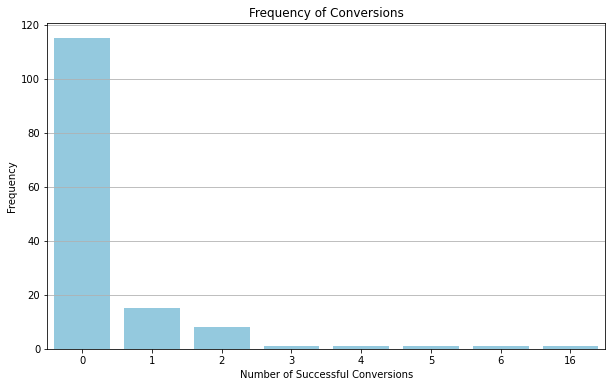

In [33]:
# Create a new DataFrame for conversion frequency
conversion_frequency = (
    country_conversion.groupby("total_success").size().reset_index(name="frequency")
)

# Plotting the frequency of conversions
plt.figure(figsize=(10, 6))
sns.barplot(
    data=conversion_frequency, x="total_success", y="frequency", color="skyblue"
)
plt.title("Frequency of Conversions")
plt.xlabel("Number of Successful Conversions")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

In [34]:
user_data

,user_id,event_count,country,successful,average_load_time,event_bench_load_success_count,event_profile_search_success_count,event_add_profile_success_count,event_upgrade_plan_count,event_pricing_model_count,event_profile_load_fail_count,event_email_receipt_count
0,cd6d41c28b017733e39fc13e4d4ae3b308c6baff52561d...,6973,United States,0,1.238146,0,2,1,3,3,3450,1
1,5929c3eec5a2b12ee4aa911b8093b33ac7b798d59e3b14...,4700,Indonesia,0,1.040046,1,2,2,1,1,0,4
2,622748abdc404cbf098568074c232b04762d574fa48130...,3925,Ukraine,0,1.823422,0,1,3,4,4,1849,1
3,fd15147418cba03da1908de36ac79bc24589c9d1474716...,3538,Thailand,0,1.692242,2,2,3,1,1,1,12
4,5c54eb7d3e4821d8e633e7ef23dacafe3f5a6530715510...,3387,Germany,0,1.908071,9,35,20,0,0,1572,2
...,...,...,...,...,...,...,...,...,...,...,...,...
10603,8f14ccc4db353eaefaab6ac8efc4a3b68b2a8731a3b35a...,0,None,0,NaN,0,0,0,0,0,0,0
10604,f4f9987e642659097752e755b740f7e487f6c252f5be0c...,0,None,0,NaN,0,0,0,0,0,0,0
10605,fcc49dce067e042b96df3e56d2934e551fa4b45d0dcdb0...,0,None,0,NaN,0,0,0,0,0,0,0
10606,2a6612b86399adeeb92d2b44603d8736b1dbfcb84ccf24...,0,None,0,NaN,0,0,0,0,0,0,0


### Transform Platform

In [35]:
# convert to shortcut
data["platform"] = data["platform"].apply(
    lambda x: "fb" if x == "facebook" or x == "showFacebook" else
              "tw" if x == "twitter" else
              "ig" if x == "instagram" else
              "yt" if x == "youtube" else
              "li" if x == "linkedin" else
              "tk" if x == "tiktok" else
              "xch" if x == "cross-platform" else x
)

# rename to platform + original name + count
data["platform"] = data["platform"].apply(lambda x: f"platform_{x}_count")

# count
platform_data = (
    data.groupby(["user_id", "platform"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# merge
user_data = user_data.merge(platform_data, on="user_id", how="left")

In [36]:
# print count of each platform
user_data

,user_id,event_count,country,successful,average_load_time,event_bench_load_success_count,event_profile_search_success_count,event_add_profile_success_count,event_upgrade_plan_count,event_pricing_model_count,...,platform_fb_count,platform_hashtags_count,platform_ig_count,platform_li_count,platform_meta_count,platform_nan_count,platform_tk_count,platform_tw_count,platform_xch_count,platform_yt_count
0,cd6d41c28b017733e39fc13e4d4ae3b308c6baff52561d...,6973,United States,0,1.238146,0,2,1,3,3,...,0,0,6947,0,0,4,0,0,22,0
1,5929c3eec5a2b12ee4aa911b8093b33ac7b798d59e3b14...,4700,Indonesia,0,1.040046,1,2,2,1,1,...,0,0,0,0,0,6,4684,0,10,0
2,622748abdc404cbf098568074c232b04762d574fa48130...,3925,Ukraine,0,1.823422,0,1,3,4,4,...,64,0,3829,0,2,4,0,0,26,0
3,fd15147418cba03da1908de36ac79bc24589c9d1474716...,3538,Thailand,0,1.692242,2,2,3,1,1,...,0,0,79,0,0,18,3370,0,75,0
4,5c54eb7d3e4821d8e633e7ef23dacafe3f5a6530715510...,3387,Germany,0,1.908071,9,35,20,0,0,...,0,0,27,0,0,5,3222,40,93,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10603,8f14ccc4db353eaefaab6ac8efc4a3b68b2a8731a3b35a...,0,None,0,NaN,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10604,f4f9987e642659097752e755b740f7e487f6c252f5be0c...,0,None,0,NaN,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10605,fcc49dce067e042b96df3e56d2934e551fa4b45d0dcdb0...,0,None,0,NaN,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10606,2a6612b86399adeeb92d2b44603d8736b1dbfcb84ccf24...,0,None,0,NaN,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0


In [37]:
# add a column in user_data for total platforms of each user
user_data["platform_total_count"] = user_data.iloc[:, 5:].sum(axis=1)
print(user_data["platform_total_count"].value_counts())

platform_total_count
1        562
2        332
3        279
4        256
5        201
        ... 
564        1
578        1
579        1
574        1
10433      1
Name: count, Length: 699, dtype: int64


### Transform View

In [38]:
# rename
data["view"] = data["view"].apply(lambda x: f"view_{x}")

# convert
view_data = (
    data.groupby(["user_id", "view"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)
view_data

view,user_id,view_add,view_addprofiles,view_ads,view_bench,view_benchmark,view_brands,view_campaigns,view_connect,view_hashtag,view_nan,view_page,view_postsfeed,view_profile,view_proj,view_projecthome,view_reports,view_search,view_settings,view_upgradeplan
0,00060bf870ad790482c39c36da5372f44d56426d327c36...,0,0,0,0,0,0,0,0,0,123,0,50,0,0,29,0,0,0,0
1,0007e623b14ceefae2ea443c21ec2f35e7b1e588f74641...,0,0,0,0,0,0,0,0,0,13,0,0,14,0,0,2,0,0,0
2,00195548c17065bb6ae71b927c39e105d221c970ecf15e...,0,0,0,0,0,0,0,0,8,9,0,0,0,0,3,0,0,0,0
3,0019747558d686ee27c60a39345e2bb09792e44367d45b...,0,0,0,0,3,0,4,0,7,16,0,3,32,0,5,3,0,0,0
4,001f1cc74d3b9a713ea45e46700735bb4d1d0c062244f8...,0,0,0,0,0,0,0,0,0,34,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10603,ffd02b0dd86934f9a0bb95920521a59c64dd209995fbcf...,0,0,0,0,0,0,0,0,0,13,0,0,20,0,1,0,0,0,0
10604,ffd2841661e7cf023a5d5956c68b2b0fbb1b8d27c32fb0...,0,0,0,0,0,0,7,0,0,20,0,0,1,0,0,1,0,0,0
10605,ffd9bf8af2ff5be89bafbc0f81601f0b7885bf7e936996...,0,0,0,0,17,0,5,0,0,29,0,13,71,0,9,1,0,0,0
10606,ffe4b53d23689200a4b17c18a74fed6b4200b0584cc908...,0,0,0,0,35,6,4,0,0,11,0,19,15,0,14,2,0,0,0


In [39]:
# merge
user_data = user_data.merge(view_data, on="user_id", how="left")

In [40]:
user_data

,user_id,event_count,country,successful,average_load_time,event_bench_load_success_count,event_profile_search_success_count,event_add_profile_success_count,event_upgrade_plan_count,event_pricing_model_count,...,view_nan,view_page,view_postsfeed,view_profile,view_proj,view_projecthome,view_reports,view_search,view_settings,view_upgradeplan
0,cd6d41c28b017733e39fc13e4d4ae3b308c6baff52561d...,6973,United States,0,1.238146,0,2,1,3,3,...,16,0,8,6945,0,2,0,0,0,2
1,5929c3eec5a2b12ee4aa911b8093b33ac7b798d59e3b14...,4700,Indonesia,0,1.040046,1,2,2,1,1,...,19,0,0,4674,0,3,0,0,0,0
2,622748abdc404cbf098568074c232b04762d574fa48130...,3925,Ukraine,0,1.823422,0,1,3,4,4,...,22,0,0,3889,0,11,0,0,0,3
3,fd15147418cba03da1908de36ac79bc24589c9d1474716...,3538,Thailand,0,1.692242,2,2,3,1,1,...,46,0,8,3430,0,38,3,0,0,0
4,5c54eb7d3e4821d8e633e7ef23dacafe3f5a6530715510...,3387,Germany,0,1.908071,9,35,20,0,0,...,126,0,0,3216,0,14,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10603,8f14ccc4db353eaefaab6ac8efc4a3b68b2a8731a3b35a...,0,None,0,NaN,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10604,f4f9987e642659097752e755b740f7e487f6c252f5be0c...,0,None,0,NaN,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10605,fcc49dce067e042b96df3e56d2934e551fa4b45d0dcdb0...,0,None,0,NaN,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10606,2a6612b86399adeeb92d2b44603d8736b1dbfcb84ccf24...,0,None,0,NaN,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0


In [43]:
# print unique columns in user_data
print(user_data.columns)
# print number of columns in user_data
print("Number of columns in user_data:", len(user_data.columns))

Index(['user_id', 'event_count', 'country', 'successful', 'average_load_time',
       'event_bench_load_success_count', 'event_profile_search_success_count',
       'event_add_profile_success_count', 'event_upgrade_plan_count',
       'event_pricing_model_count', 'event_profile_load_fail_count',
       'event_email_receipt_count', 'platform_all_count',
       'platform_brbench_count', 'platform_fb_count',
       'platform_hashtags_count', 'platform_ig_count', 'platform_li_count',
       'platform_meta_count', 'platform_nan_count', 'platform_tk_count',
       'platform_tw_count', 'platform_xch_count', 'platform_yt_count',
       'platform_total_count', 'view_add', 'view_addprofiles', 'view_ads',
       'view_bench', 'view_benchmark', 'view_brands', 'view_campaigns',
       'view_connect', 'view_hashtag', 'view_nan', 'view_page',
       'view_postsfeed', 'view_profile', 'view_proj', 'view_projecthome',
       'view_reports', 'view_search', 'view_settings', 'view_upgradeplan'],
      dtyp